## Steps : 
- Importing Libraries
- Importing Data
- EDA
- Visualisation
- Model Evaluataion
- Decision Tree Classification
- Hyper Parameter Tunning
- Interview Questions

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Importing Data

In [2]:
df=pd.read_csv('heart_disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


# EDA

In [3]:
# Perform exploratory data analysis to understand the structure of the dataset.

df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [4]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [5]:
# Checking for missing values,

df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,asymptomatic,110,0,True,normal,92,FALSE,0.0,flat,fixed defect,4
902,62,Male,asymptomatic,160,254,True,st-t abnormality,108,TRUE,3.0,flat,fixed defect,4
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4


In [12]:
# checking for the Outliers

def outlier_Detection(df,columns):
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        iqr=Q3-Q1
        lower=Q1-1.5*iqr
        upper=Q3+1.5*iqr
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    return df   

In [13]:
outlier_Detection(df,['age','trestbps','chol','thalch','oldpeak'])

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,FALSE,2.3,downsloping,fixed defect,0
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,FALSE,0.0,flat,fixed defect,0
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,FALSE,0.4,flat,fixed defect,0
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,FALSE,0.0,flat,fixed defect,0
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51.0,Male,asymptomatic,110.0,38.5,True,normal,92.0,FALSE,0.0,flat,fixed defect,4
902,62.0,Male,asymptomatic,160.0,254.0,True,st-t abnormality,108.0,TRUE,3.0,flat,fixed defect,4
903,53.0,Male,asymptomatic,125.0,38.5,False,normal,120.0,FALSE,1.5,upsloping,reversable defect,4
904,62.0,Male,asymptomatic,166.0,170.0,False,st-t abnormality,120.0,TRUE,3.0,flat,fixed defect,4


# Visualisation

<Figure size 5000x2500 with 0 Axes>

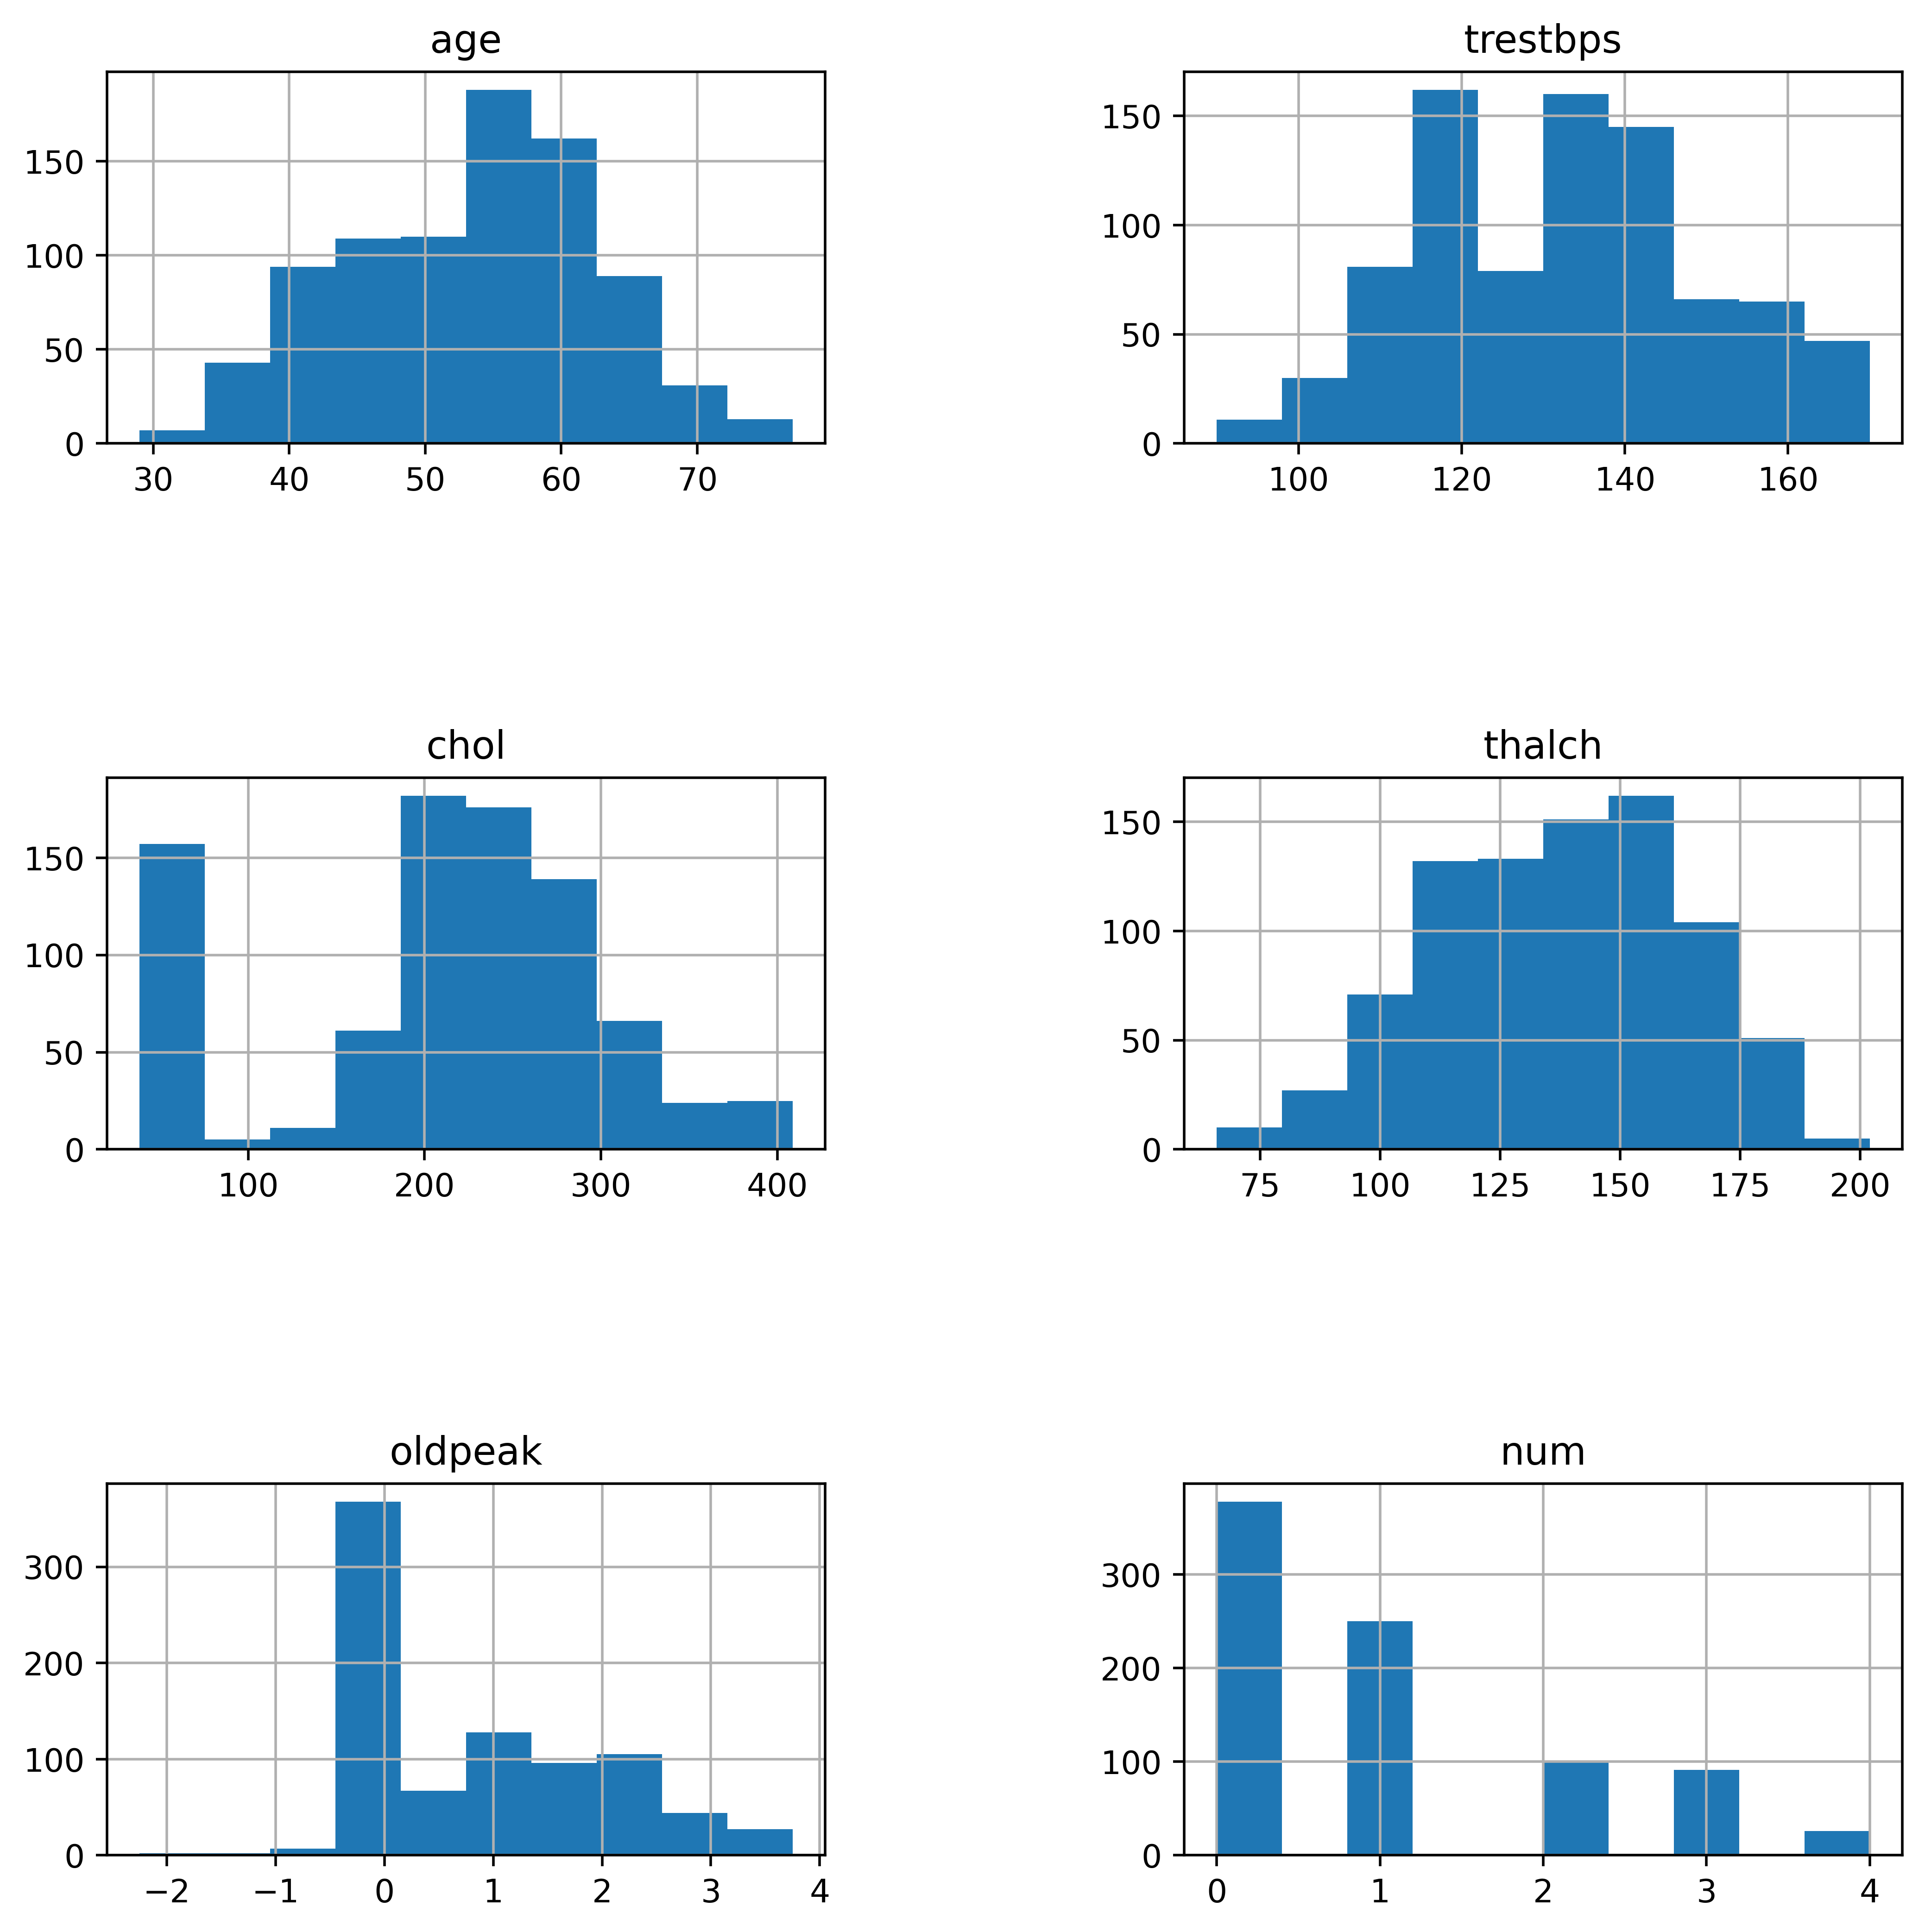

In [14]:
# Histogram

plt.figure(figsize=(10,5))
plt.tight_layout()
df.hist()
plt.subplots_adjust(hspace = 0.9, wspace = 0.5)
plt.show()

In [15]:
# Boxplot

sns.boxplot(df)

<Axes: >

In [16]:
df.dtypes

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs            bool
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [17]:
# Outlier Detection
# converting categories into numbers using Label Encoding

from sklearn.preprocessing import LabelEncoder
import pandas as pd 
sf=pd.DataFrame(df)

label_encoder= LabelEncoder()

columns_to_encode=["sex","cp","fbs","restecg","exang","slope","thal"]
for col in columns_to_encode:
    sf[col]=label_encoder.fit_transform(sf[col])
print(sf)

      age  sex  cp  trestbps   chol  fbs  restecg  thalch  exang  oldpeak  \
0    63.0    1   3     145.0  233.0    1        0   150.0      0      2.3   
1    41.0    1   1     135.0  203.0    0        1   132.0      0      0.0   
2    57.0    1   0     140.0  192.0    0        1   148.0      0      0.4   
3    52.0    1   3     118.0  186.0    0        0   190.0      0      0.0   
4    57.0    1   0     110.0  201.0    0        1   126.0      1      1.5   
..    ...  ...  ..       ...    ...  ...      ...     ...    ...      ...   
901  51.0    1   0     110.0   38.5    1        1    92.0      0      0.0   
902  62.0    1   0     160.0  254.0    1        2   108.0      1      3.0   
903  53.0    1   0     125.0   38.5    0        1   120.0      0      1.5   
904  62.0    1   0     166.0  170.0    0        2   120.0      1      3.0   
905  56.0    1   2     170.0   38.5    0        0   123.0      1      2.5   

     slope  thal  num  
0        0     0    0  
1        1     0    0  
2  

In [18]:
sf.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,1.000000,0.036332,-0.091002,0.258945,-0.099826,0.176690,-0.036622,-0.346348,0.193501,0.245778,-0.052267,0.074469,0.331399
sex,0.036332,1.000000,-0.139701,0.009052,-0.204707,0.074986,0.056826,-0.176210,0.182355,0.108614,-0.048384,0.067284,0.259610
cp,-0.091002,-0.139701,1.000000,-0.007997,0.061304,-0.034057,-0.102703,0.290958,-0.373222,-0.178455,0.094128,-0.038923,-0.330406
trestbps,0.258945,0.009052,-0.007997,1.000000,0.110577,0.098237,0.026203,-0.107227,0.154928,0.176647,0.011546,0.005160,0.134496
chol,-0.099826,-0.204707,0.061304,0.110577,1.000000,-0.122200,-0.205499,0.221645,-0.030012,0.032064,0.050961,-0.081191,-0.246145
fbs,0.176690,0.074986,-0.034057,0.098237,-0.122200,1.000000,0.026194,-0.061604,0.011228,0.028498,-0.041716,-0.022949,0.137588
restecg,-0.036622,0.056826,-0.102703,0.026203,-0.205499,0.026194,1.000000,-0.182880,0.063988,-0.032878,-0.104624,-0.111343,0.005610
thalch,-0.346348,-0.176210,0.290958,-0.107227,0.221645,-0.061604,-0.182880,1.000000,-0.350430,-0.143052,0.251257,-0.024755,-0.350252
exang,0.193501,0.182355,-0.373222,0.154928,-0.030012,0.011228,0.063988,-0.350430,1.000000,0.394693,-0.163695,0.056742,0.385383
oldpeak,0.245778,0.108614,-0.178455,0.176647,0.032064,0.028498,-0.032878,-0.143052,0.394693,1.000000,-0.186310,0.047215,0.437646


# Model Evaluation

In [19]:
x=sf.drop(columns = ['num'])
y=sf['num']
y

0      0
1      0
2      0
3      0
4      0
      ..
901    4
902    4
903    4
904    4
905    4
Name: num, Length: 846, dtype: int64

In [20]:
# Split the dataset into training and testing sets (e.g., using an 80-20 split).

xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=1)


In [21]:
xtrain.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
136,51.0,1,3,125.0,213.0,0,0,125.0,1,1.4,2,1
224,54.0,0,1,120.0,221.0,0,1,138.0,0,1.0,2,1
409,39.0,1,0,110.0,280.0,0,1,150.0,0,0.0,1,0
135,74.0,0,1,120.0,269.0,0,0,121.0,1,0.2,2,1
642,62.0,1,1,120.0,254.0,0,0,93.0,1,0.0,1,0


In [22]:
ytrain

136    0
224    0
409    1
135    0
642    1
      ..
751    2
812    3
73     0
236    0
38     0
Name: num, Length: 676, dtype: int64

In [23]:
dt = DecisionTreeClassifier(criterion='entropy')

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
ypred

array([1, 0, 2, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 3, 4, 0, 1, 0, 0, 0,
       1, 3, 3, 3, 0, 2, 2, 4, 0, 1, 1, 0, 1, 0, 2, 2, 1, 2, 1, 1, 1, 0,
       0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 3, 1, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1,
       0, 2, 1, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 2, 0, 0, 1, 3, 0, 0, 3,
       3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 3, 0, 0, 1, 2,
       1, 1, 3, 1, 1, 0, 0, 1, 2, 0, 4, 1, 3, 0, 2, 1, 0, 0, 1, 1, 0, 0,
       1, 2, 1, 2, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [24]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'],
      dtype='object')

In [25]:
dt.feature_importances_  

array([0.15896643, 0.02758959, 0.1109464 , 0.0940668 , 0.1508424 ,
       0.01651009, 0.03650922, 0.14290028, 0.03585104, 0.14304173,
       0.04279058, 0.03998544])

# Model Evaluation

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.66      0.71      0.68        76
           1       0.41      0.42      0.41        48
           2       0.30      0.26      0.28        27
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         6

    accuracy                           0.48       170
   macro avg       0.27      0.28      0.28       170
weighted avg       0.46      0.48      0.47       170



In [28]:
confusion_matrix(ytest,ypred)

array([[54, 13,  6,  3,  0],
       [15, 20,  6,  7,  0],
       [ 7,  9,  7,  2,  2],
       [ 4,  5,  2,  0,  2],
       [ 2,  2,  2,  0,  0]], dtype=int64)

In [29]:
dt.score(xtrain,ytrain)
dt.score(xtest,ytest)

0.4764705882352941

In [30]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', np.round(dt.score(xtest,ytest),2))

Training accuracy:  1.0
Testing Accuracy:  0.48


In [31]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'],
      dtype='object')

In [32]:
sf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,0
1,41.0,1,1,135.0,203.0,0,1,132.0,0,0.0,1,0,0
2,57.0,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,0
3,52.0,1,3,118.0,186.0,0,0,190.0,0,0.0,1,0,0
4,57.0,1,0,110.0,201.0,0,1,126.0,1,1.5,1,0,0


In [33]:
df['num'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

## Decision Tree Classification

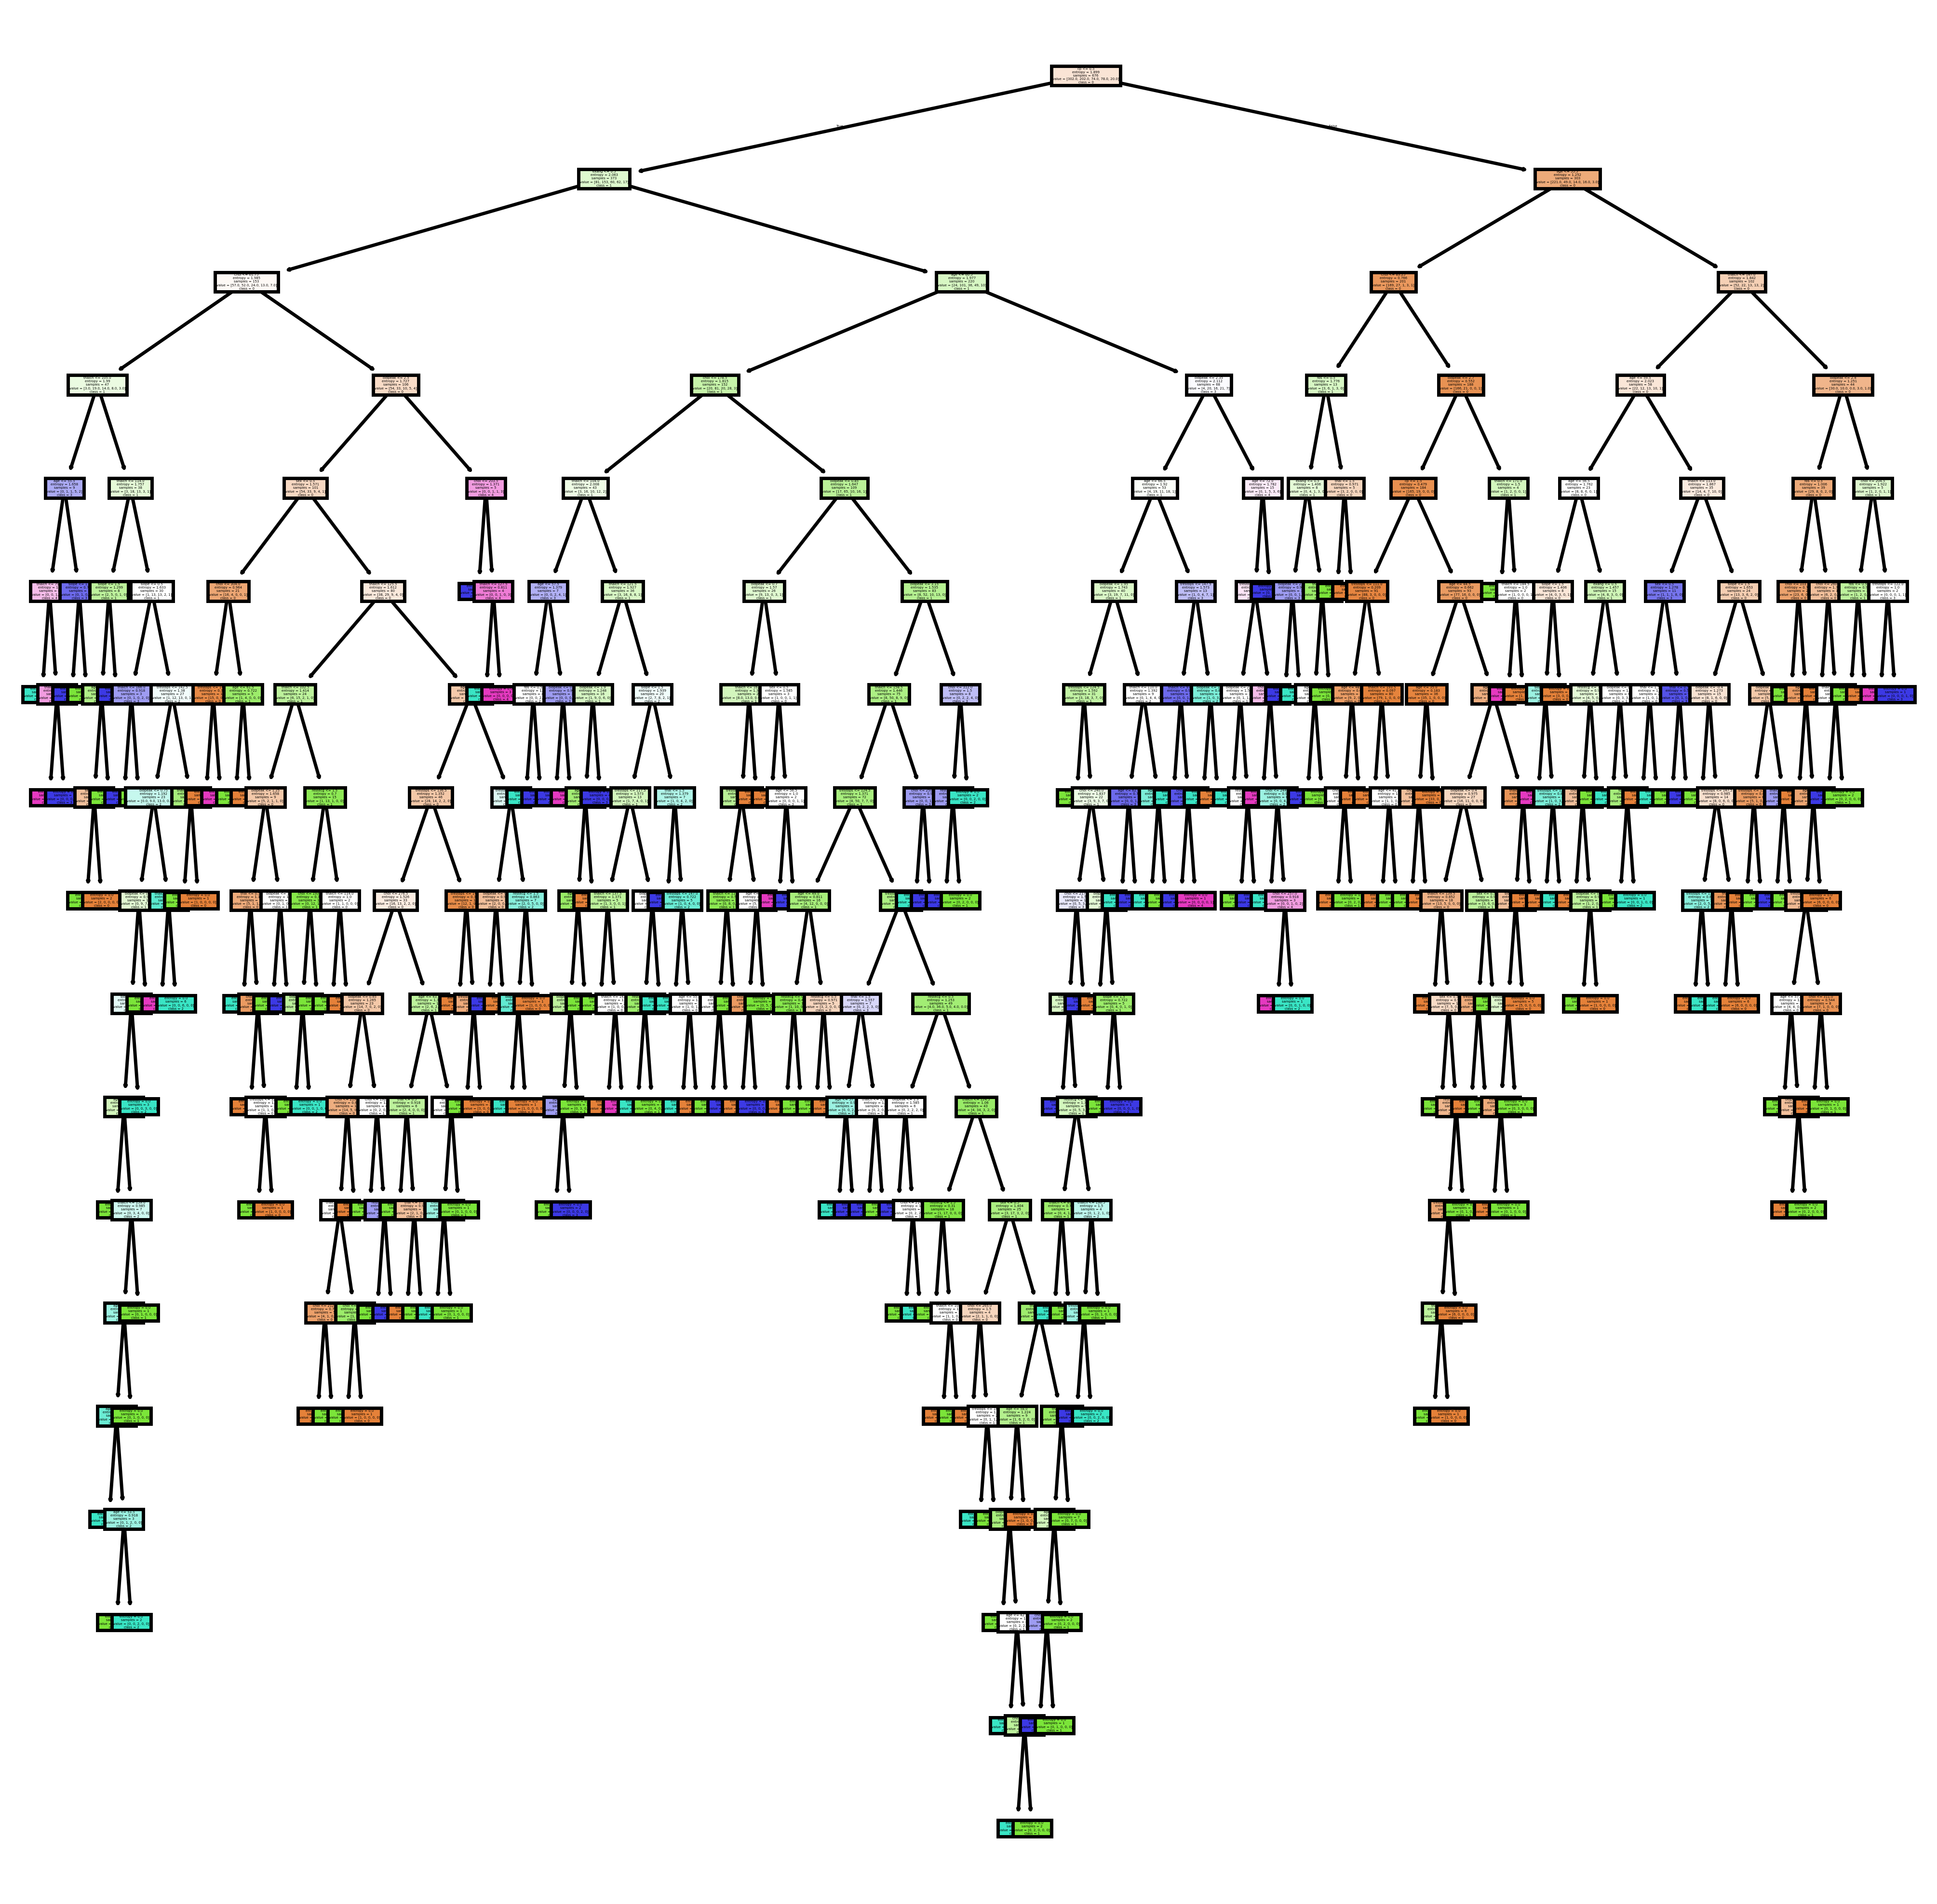

In [34]:
tree.plot_tree(dt,feature_names=x.columns,class_names=[str(i) for i in y.unique()], filled=True)
plt.show()

# Hyperparameter tuning


In [35]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
params = {
    'criterion' : ['squared_error','absolute_error'],
    'max_depth'  : [2,4,6,8],
    'splitter'  : ['best','random']
}

In [38]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=params,
                   verbose=1)

In [39]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 4, 6, 8],
                         'splitter': ['best', 'random']},
             verbose=1)

In [40]:
grid.best_params_

{'criterion': 'squared_error', 'max_depth': 6, 'splitter': 'random'}

In [41]:
dtr = DecisionTreeRegressor(criterion='absolute_error',
                           max_depth=8,splitter='random')

In [42]:
dtr.fit(xtrain,ytrain)
ypred  = dtr.predict(xtest)

In [43]:
dtr.score(xtrain,ytrain),dtr.score(xtest,ytest)

(0.6358553349334497, 0.031615265455569475)

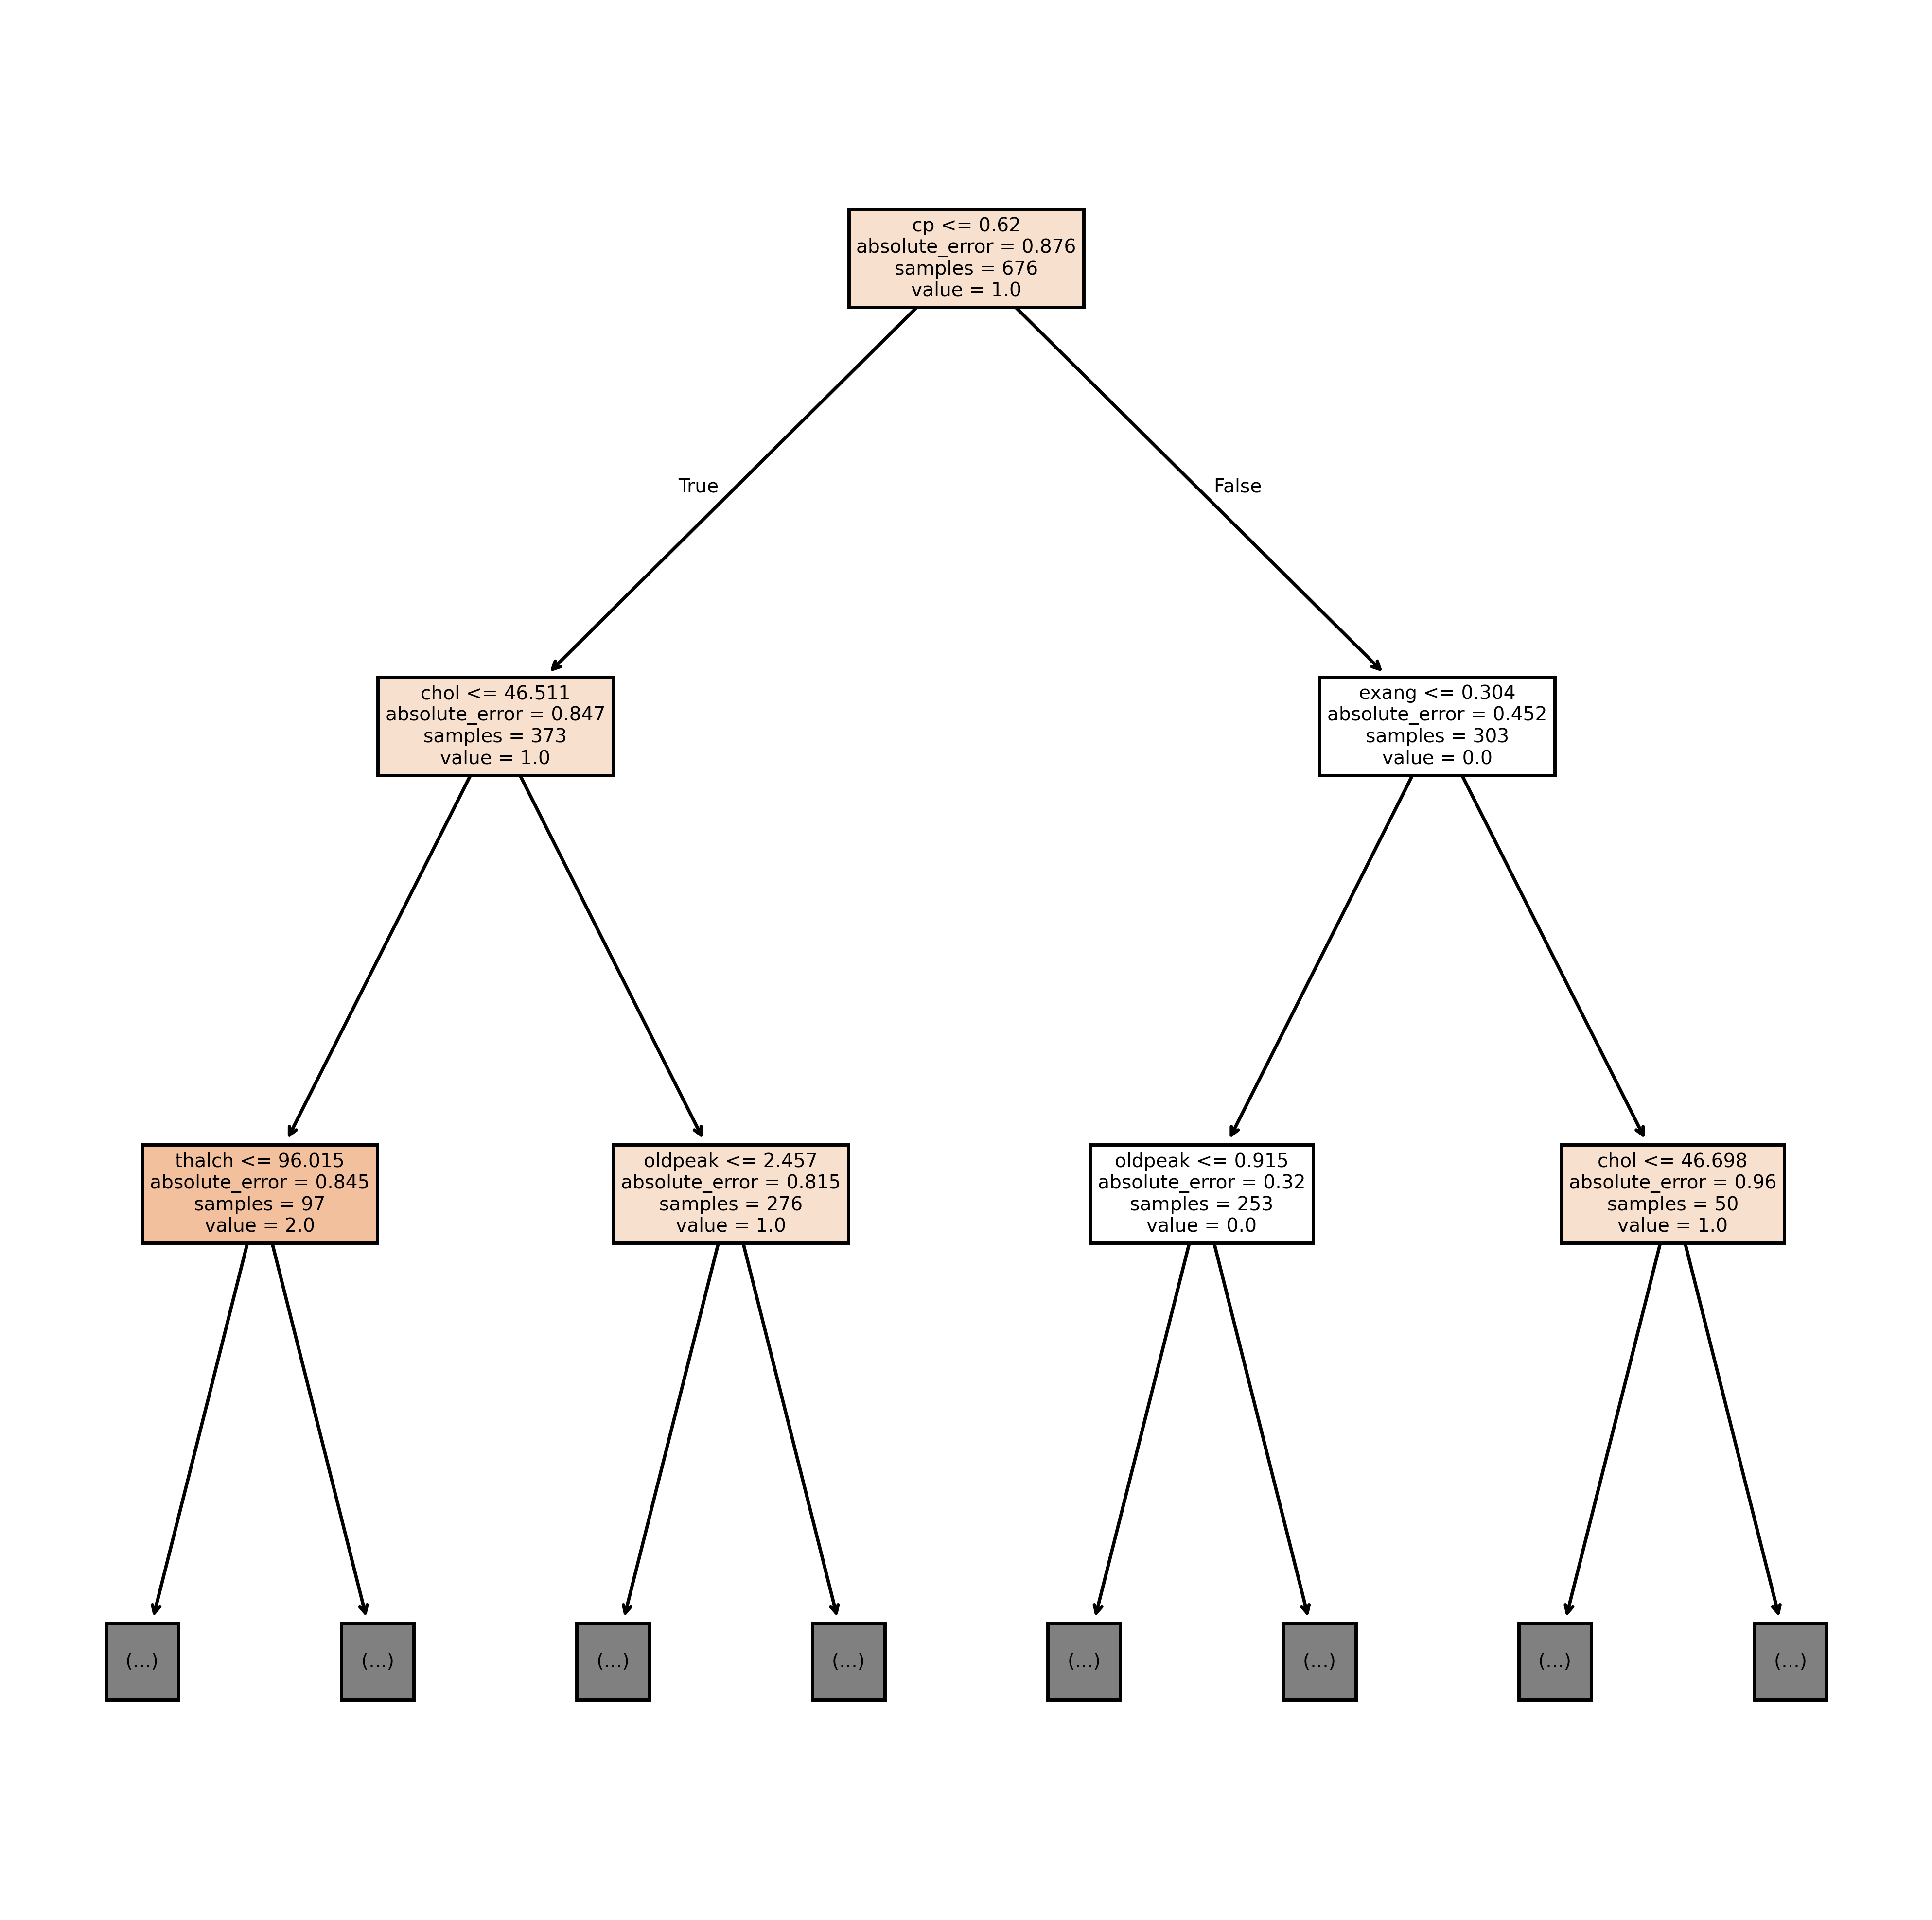

In [44]:
tree.plot_tree(dtr, feature_names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'],filled=True, max_depth =2 )
plt.show()

# Interview Questions:

## 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
- Decision trees are powerful models extensively used in machine learning for classification and regression tasks. The structure of decision trees resembles the flowchart of decisions helps us to interpret and explain easily.
- The performance of decision trees highly relies on the hyperparameters, selecting the optimal hyperparameter can significantly impact the model’s accuracy, generalization ability, and robustness.
- Decision trees are versatile algorithms used in machine learning that perform classification and regression tasks. They can even handle multi-output tasks for various predictive modeling tasks.
-  A model parameter is an adjustable parameter that is said to be learned from the training data during the model's training process. In decision trees, there are two types of model parameters such as learnable and non-learnable parameters.

# 2. What is the difference between the Label encoding and One-hot encoding?
- One hot Encoding
1. A column with categorical values is split into multiple columns.
2. It will add more columns and will be computationally heavy
3. Redundant information is there
4. Only 0 and 1 are used to represent data

- 	Label Encoding
1. The categorical values are labeled into numeric values by assigning each category to a number	
2. Different columns are not added. Rather different categories are converted into numeric values. So fewer computations.	
3. Unique information is there	
4. Different integers are used to represent data